In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [2]:
ls

 Centrality.ipynb
 GATEIO_WEMIXUSDT_D.xlsx
 WEMIX_2022-10-24~2022-12-31_centrality.csv
 WEMIX_2022-10-24~2023-02-22_centrality.csv
 WEMIX_2022-11-24~2023-02-22_cal.csv
 WEMIX_2022-11-24~2023-02-23.csv
'WEMIX_2022_11.10~11.24_TOP50_sender&receiver.csv'
 WEMIX_2022_2023_sum_address.csv
'WEMIX_2023-01-01~2023-02-22_centrality(in_out).csv'
 WEMIX_Pagerank_top300.csv
 WEMIX_betweenness_top300.csv
 WEMIX_final_account.csv
 WEMIX_unique_wallet.csv
 duration_transivity_assortativity.ipynb
 final_moving_graph-Copy1.ipynb
 final_moving_graph.ipynb
 final_project_dataset.ipynb
 temp-plot.html


In [3]:
df = pd.read_csv('WEMIX_2022-11-24~2023-02-22_cal.csv', index_col = 0)

In [4]:
df['date'] = pd.to_datetime(df['date'])
df

date  reciprocity  assortativity  strongly_connected_components  \
0   2022-10-24     0.039704      -0.443510                           5634   
1   2022-10-25     0.053349      -0.438961                           1497   
2   2022-10-26     0.026779      -0.451301                          10715   
3   2022-10-27     0.113799      -0.534504                           2613   
4   2022-10-28     0.091662      -0.553026                           3474   
..         ...          ...            ...                            ...   
117 2023-02-18     0.094353      -0.446855                           1188   
118 2023-02-19     0.136721      -0.456076                            932   
119 2023-02-20     0.139293      -0.431172                           1229   
120 2023-02-21     0.132738      -0.432145                           1636   
121 2023-02-22     0.131894      -0.441292                           1033   

     largest_scc_nodes  largest_scc_edges  weakly_connected_components  \
0                 2457               4968                           36   
1                 2098               4240                           30   
2                 2037               4099                           16   
3                 2008               4479                           23   
4                 2383               5140                           23   
..                 ...                ...                          ...   
117                555               1334                           18   
118                373               1007                           19   
119                497               1359                           20   
120                478               1391                           29   
121                505               1309                           19   

     largest_wcc_nodes  largest_wcc_edges  transitivity  \
0                 8026              11591      0.000071   
1                 3540               6640      0.000282   
2                12722              15664      0.000017   
3                 4577               8076      0.000378   
4                 5818               9748      0.000234   
..                 ...                ...           ...   
117               1702               2773      0.002401   
118               1265               2141      0.004651   
119               1687               2864      0.004779   
120               2054               3325      0.004428   
121               1494               2561      0.003863   

     global_clustering_coefficient  num_articulation_points  max_core_number  \
0                         0.014740                      276                8   
1                         0.039493                      249                7   
2                         0.009750                      186                7   
3                         0.039180                      171                8   
4                         0.035053                      149                8   
..                             ...                      ...              ...   
117                       0.055534                      191                9   
118                       0.057355                      140                9   
119                       0.068648                      258                9   
120                       0.060295                      290                9   
121                       0.063033                      161                9   

     adhesion  cohesion  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  
..        ...       ...  
117         0         0  
118         0         0  
119         0         0  
120         0         0  
121         0         0  

[122 rows x 15 columns]

In [5]:
event = pd.read_csv('../../wemix_event.csv')

In [6]:
event.dropna(inplace = True)
event['Date'] = pd.to_datetime(event['Date'])

In [7]:
event

Date  memo  important
0   2024-07-01    소각          2
1   2024-07-01    이동          2
2   2024-05-10    이동          2
3   2024-03-28  상장폐지          1
4   2024-03-13    이동          2
..         ...   ...        ...
240 2021-09-16    20          4
241 2021-09-14    13          3
242 2021-09-06    13          3
243 2021-09-05    13          3
244 2021-09-04    20          4

[245 rows x 3 columns]

In [8]:
event.rename(columns = {"Date" : "date"}, inplace = True)

In [9]:
start = datetime(2022,10,24)
end = datetime(2023,2,23)

event_2021 = event[(event['date'] >= start) & (event['date'] <= end)]
event_2021

date memo  important
82  2023-02-23   이동          2
83  2023-02-21   이동          2
84  2023-02-21   이동          2
85  2023-02-21   이동          2
86  2023-02-21   이동          2
..         ...  ...        ...
186 2022-11-25   13          3
187 2022-11-24   20          4
188 2022-11-04   13          3
189 2022-11-02   13          3
190 2022-10-27   20          4

[67 rows x 3 columns]

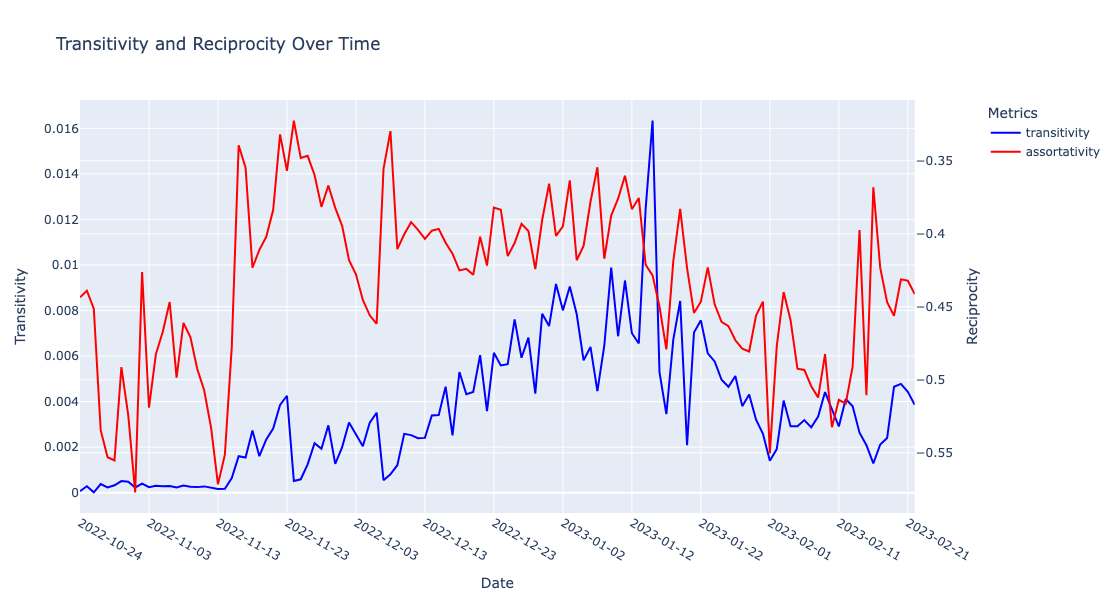

In [10]:
# 색상 매핑 정의
color_map = {1: 'green', 2: 'purple', 3: 'orange', 4: 'brown'}

# 그래프 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 주요 데이터 추가
fig.add_trace(
    go.Scatter(x=df['date'], y=df['transitivity'], name='transitivity', mode='lines', line=dict(color='blue', width=2)),
    secondary_y=False, 
)

fig.add_trace(
    go.Scatter(x=df['date'], y=df['assortativity'], name='assortativity', mode='lines', line=dict(color='red', width=2)),
    secondary_y=True, 
)

# 레이아웃 설정
fig.update_layout(
    title='Transitivity and Reciprocity Over Time',
    xaxis_title='Date',
    yaxis_title='Transitivity',
    yaxis2_title='Reciprocity',
    legend_title='Metrics',
    hovermode='x unified',
    width=1000,
    height=600,
    # updatemenus=[dict(
    #     type="buttons",
    #     direction="right",
    #     active=0,
    #     x=0.57,
    #     y=- 0.1,
    #     buttons=buttons,
    # )]
)

# x축 틱 설정 (60일 간격)
date_all = df['date'].tolist()
fig.update_xaxes(tickvals=date_all[::10], tickformat='%Y-%m-%d')

# 그래프 표시
fig.show()

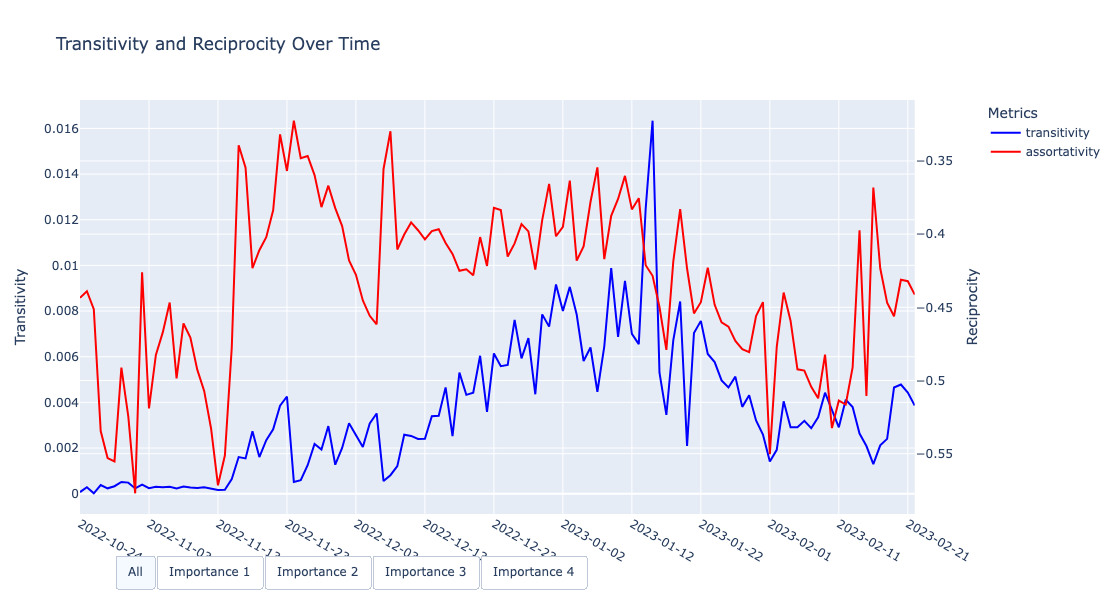

In [11]:
# 색상 매핑 정의
color_map = {1: 'green', 2: 'purple', 3: 'orange', 4: 'brown'}


# 그래프 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 주요 데이터 추가 (transitivity, assortativity)
fig.add_trace(
    go.Scatter(x=df['date'], y=df['transitivity'], name='transitivity', mode='lines', line=dict(color='blue', width=2)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['date'], y=df['assortativity'], name='assortativity', mode='lines', line=dict(color='red', width=2)),
    secondary_y=True,
)

max_transitivity = df['transitivity'].max()

# 이벤트 데이터를 Scatter trace로 추가 (초기에는 모든 이벤트 숨김)
for importance, color in color_map.items():
    event_dates = event_2021[event_2021['important'] == importance]['date']
    fig.add_trace(
        go.Scatter(
            x=event_dates,
            y=[max_transitivity]*len(event_dates),  # y축은 고정된 값으로 설정 (event를 표시하기 위해)
            mode='markers+text',
            marker=dict(size=10, color=color),
            text=[f"{d.strftime('%Y-%m-%d')}" for d in event_dates],
            textposition="top center",
            name=f'Importance {importance}',
            visible=False  # 초기에는 모든 이벤트 숨김
        )
    )

# 버튼 정의
buttons = [
    dict(label="All", method="update", 
         args=[{"visible": [True, True] + [True]*len(color_map)}]),  # 모든 이벤트 표시
    dict(label="Importance 1", method="update", 
         args=[{"visible": [True, True] + [importance == 1 for importance in color_map]}]),  # importance 1만 표시
    dict(label="Importance 2", method="update", 
         args=[{"visible": [True, True] + [importance == 2 for importance in color_map]}]),  # importance 2만 표시
    dict(label="Importance 3", method="update", 
         args=[{"visible": [True, True] + [importance == 3 for importance in color_map]}]),  # importance 3만 표시
    dict(label="Importance 4", method="update", 
         args=[{"visible": [True, True] + [importance == 4 for importance in color_map]}]),  # importance 4만 표시
]

# 레이아웃 설정
fig.update_layout(
    title='Transitivity and Reciprocity Over Time',
    xaxis_title='Date',
    yaxis_title='Transitivity',
    yaxis2_title='Reciprocity',
    legend_title='Metrics',
    hovermode='x unified',
    width=1000,
    height=600,
    updatemenus=[dict(
        type="buttons",
        direction="right",
        active=0,  # 초기에는 "All" 버튼 활성화
        x=0.57,
        y= -0.1,
        buttons=buttons,
    )]
)

# x축 틱 설정 (10일 간격)
date_all = df['date'].tolist()
fig.update_xaxes(tickvals=date_all[::10], tickformat='%Y-%m-%d')

# 그래프 표시
fig.show()

# Save the figure as an HTML file
pio.write_html(fig, file='./temp.html', auto_open=False)

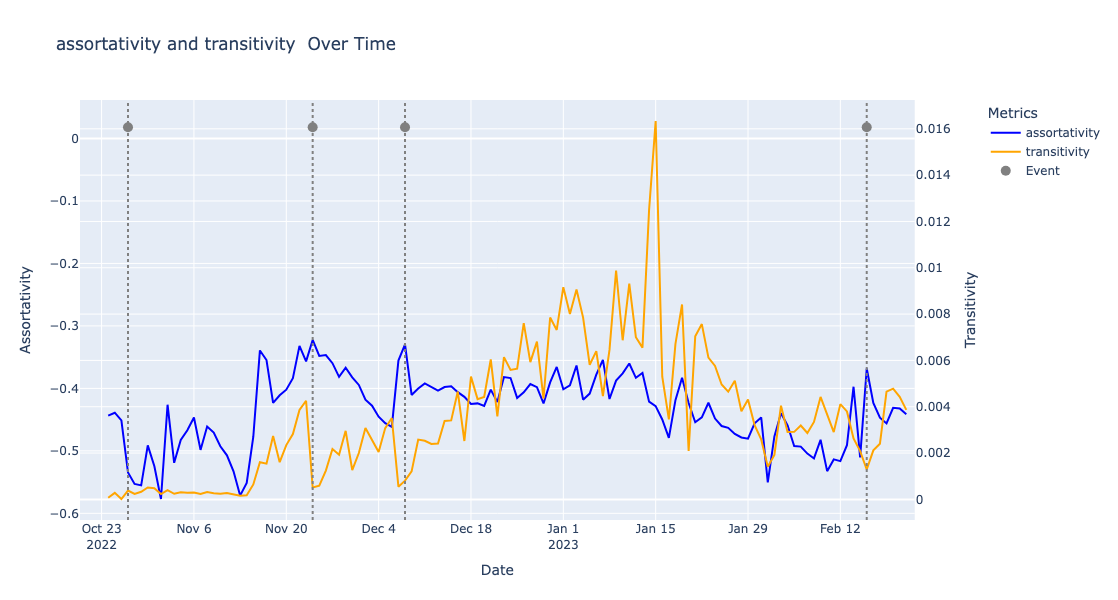

In [60]:
# 그래프 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

small_value = ['reciprocity', 'assortativity', 'transitivity', 'global_clustering_coefficient']

# 주요 데이터 추가
# fig.add_trace(
#     go.Scatter(x=df['date'], y=df[small_value[0]], name=f'{small_value[0]}', mode='lines', line=dict(color='red', width=2)), secondary_y=False,
# )

fig.add_trace(
    go.Scatter(x=df['date'], y=df[small_value[1]], name=f'{small_value[1]}', mode='lines', line=dict(color='blue', width=2)), secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['date'], y=df[small_value[2]], name=f'{small_value[2]}', mode='lines', line=dict(color='orange', width=2)), secondary_y=True
)

# fig.add_trace(
#     go.Scatter(x=df['date'], y=df[small_value[3]], name=f'{small_value[3]}', mode='lines', line=dict(color='green', width=2)), secondary_y=False,
# )

# 세로 점선 vline 추가
for date in marker_dates:
    fig.add_vline(
        x=date, 
        line_width=2, 
        line_dash="dot", 
        line_color="grey"
    )

# Marker trace 추가 (y 값 지정)
fig.add_trace(
    go.Scatter(
        x=marker_dates,
        y=[max(df['transitivity']) * 1.1] * len(marker_dates), # y값을 그래프 최대값보다 살짝 높게 설정
        mode='markers',
        marker=dict(
            size=10,
            color='grey',
            symbol='circle'
        ),
        name='Event'
    )
)

fig.update_layout(
    title=f'{small_value[1]} and {small_value[2]}  Over Time',
    xaxis_title='Date',
    yaxis_title='Assortativity',
    yaxis2_title='Transitivity',
    legend_title='Metrics',
    hovermode='x unified',
    width=1000,
    height=600
)

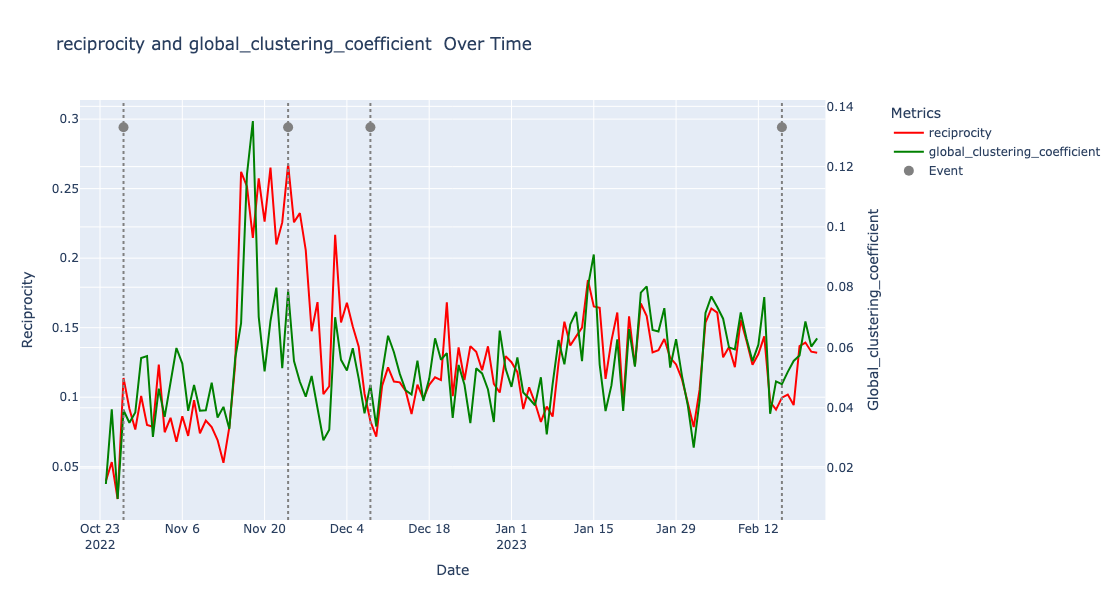

In [61]:
# 그래프 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

small_value = ['reciprocity', 'assortativity', 'transitivity', 'global_clustering_coefficient']

# 주요 데이터 추가
fig.add_trace(
    go.Scatter(x=df['date'], y=df[small_value[0]], name=f'{small_value[0]}', mode='lines', line=dict(color='red', width=2)), secondary_y=False,
)

# fig.add_trace(
#     go.Scatter(x=df['date'], y=df[small_value[1]], name=f'{small_value[1]}', mode='lines', line=dict(color='blue', width=2)), secondary_y=False,
# )

# fig.add_trace(
#     go.Scatter(x=df['date'], y=df[small_value[2]], name=f'{small_value[2]}', mode='lines', line=dict(color='orange', width=2)), secondary_y=True
# )

fig.add_trace(
    go.Scatter(x=df['date'], y=df[small_value[3]], name=f'{small_value[3]}', mode='lines', line=dict(color='green', width=2)), secondary_y=True,
)

# 세로 점선 vline 추가
for date in marker_dates:
    fig.add_vline(
        x=date, 
        line_width=2, 
        line_dash="dot", 
        line_color="grey"
    )

# Marker trace 추가 (y 값 지정)
fig.add_trace(
    go.Scatter(
        x=marker_dates,
        y=[max(df['reciprocity']) * 1.1] * len(marker_dates), # y값을 그래프 최대값보다 살짝 높게 설정
        mode='markers',
        marker=dict(
            size=10,
            color='grey',
            symbol='circle'
        ),
        name='Event'
    )
)

fig.update_layout(
    title=f'{small_value[0]} and {small_value[3]}  Over Time',
    xaxis_title='Date',
    yaxis_title='Reciprocity',
    yaxis2_title='Global_clustering_coefficient',
    legend_title='Metrics',
    hovermode='x unified',
    width=1000,
    height=600
)

In [22]:
df.columns
big_values = ['strongly_connected_components','largest_scc_nodes', 'largest_scc_edges', 
              'weakly_connected_components','largest_wcc_nodes', 'largest_wcc_edges','num_articulation_points']

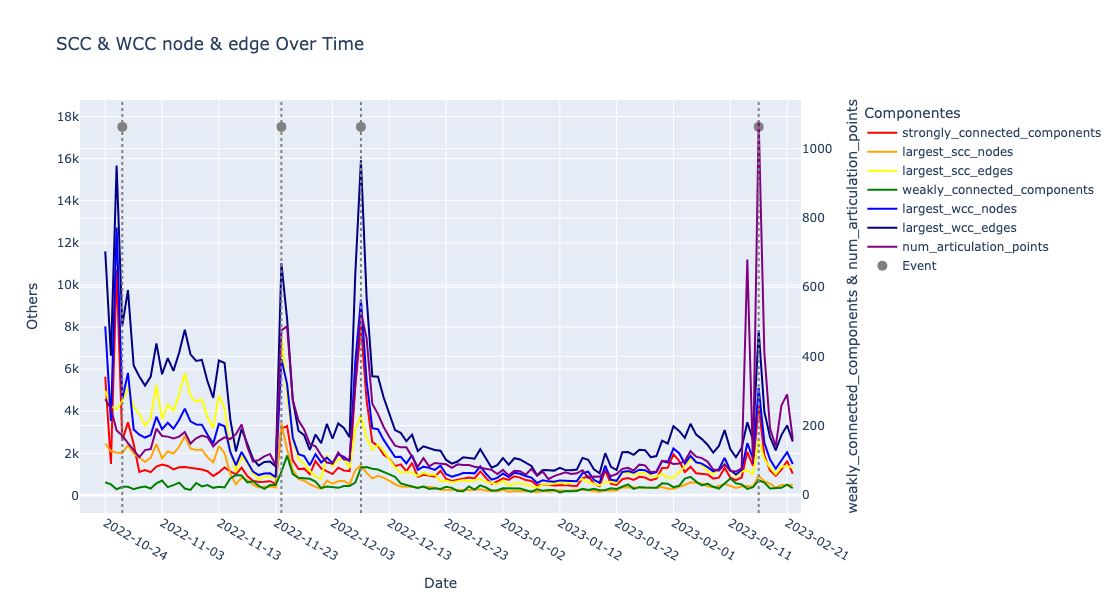

In [62]:
# 그래프 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

color_big = ['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple']

marker_dates = ["2022-10-27", "2022-11-24", "2022-12-08", "2023-02-16"]

for num in range(len(big_values)):
    # 주요 데이터 추가
    if num == 3 or num == 6:
        fig.add_trace(
            go.Scatter(x=df['date'], y=df[big_values[num]], name=f'{big_values[num]}', mode='lines', line=dict(color=color_big[num], width=2)),
            secondary_y=True,
        )
    else:
        fig.add_trace(
            go.Scatter(x=df['date'], y=df[big_values[num]], name=f'{big_values[num]}', mode='lines', line=dict(color=color_big[num], width=2)),
            secondary_y=False,
        )

# 세로 점선 vline 추가
for date in marker_dates:
    fig.add_vline(
        x=date, 
        line_width=2, 
        line_dash="dot", 
        line_color="grey"
    )

# Marker trace 추가 (y 값 지정)
fig.add_trace(
    go.Scatter(
        x=marker_dates,
        y=[max(df['largest_wcc_edges']) * 1.1] * len(marker_dates), # y값을 그래프 최대값보다 살짝 높게 설정
        mode='markers',
        marker=dict(
            size=10,
            color='grey',
            symbol='circle'
        ),
        name='Event'
    )
)

fig.update_layout(
    title=f'SCC & WCC node & edge Over Time',
    xaxis_title='Date',
    yaxis_title='Others',
    yaxis2_title=f'{big_values[3]} & {big_values[6]}',
    legend_title='Componentes',
    hovermode='x unified',
    width=1000,
    height=600
)

# x축 틱 설정 (10일 간격)
date_all = df['date'].tolist()
fig.update_xaxes(tickvals=date_all[::10], tickformat='%Y-%m-%d')

In [63]:
pio.write_html(fig, file='./scc_wcc_event.html', auto_open=False)